In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("Speed_Dating_Data.csv",encoding = "ISO-8859-1")

In [3]:
data.rename(columns={"condtn":"Condition",
                     "mn_sat":"median_sat",
                     "age_o":"age_of_partner",
                     "race_o":"race_of_partner",
                     "pf_o_att":"partner_stated_preference", # préférence déclarée par le partenaire
                     "dec_o":"partner's_decision",
                     "attr_o":"partner_rating_of_attributes", # évaluation des attributs par le partenaire
                     "imprace":"race_importance",
                     "imprelig":"religion_importance",
                     "from":"originally_from",
                     "date":"frequency_of_date"},  # fréquence des rendez-vous
                     inplace=True)

In [4]:
# replace gender
data['gender'] = data['gender'].replace([0,1],['female','male'])

In [5]:
# replace race
data['race'] = data['race'].replace([1,2,3,4,5,6],
                                    ["Black/African American","European/Caucasion-American","Latino/Hispanic American",
                                     "Asian/Pacific Islander/Asian-American", "Native American","Other"])

In [6]:
data.race_of_partner = data.race_of_partner.replace([1,2,3,4,5,6],
                                            ["Black/African American","European/Caucasion-American","Latino/Hispanic American",
                                             "Asian/Pacific Islander/Asian-American", "Native American","Other"])

In [7]:
# carrière envisagée
data.career_c = data.career_c.replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
                                     ["Lawyer","Academic/Research","Psychologist","Doctor/Medicine","Engineer","Creative Arts/Entertainment", 
                                      "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin","Real Estate" ,"International/Humanitarian Affairs",
                                      "Undecided", "Social Work","Speech Pathology","Politics","Pro sports/Athletics","Other","Journalism","Architecture"])


In [8]:
# but de speeg dating
data.goal=data.goal.replace([1,2,3,4,5,6],
                            ["Seemed like a fan night out","To meet new people","To get a date","Looking for serious relationship",
                             "To say I did it","Other"])

In [9]:
data.frequency_of_date = data.frequency_of_date.replace([1,2,3,4,5,6,7],
                                                        ["Several times a week","Twice a week","Once a week","Twice a month",
                                                        "Once a month","Several times a year","Almost never"])

In [10]:
# statistiques de l'échantillon

In [11]:
cols = ['iid','gender','race','originally_from','income','goal','frequency_of_date']
analysis_stat = data[cols] 

In [12]:
print("Nombre de participant :")
analysis_stat=analysis_stat.drop_duplicates(subset=['iid','gender','race','originally_from','income','goal','frequency_of_date'], keep='first')

print(analysis_stat.shape[0])

Nombre de participant :
551


In [13]:
analysis_stat.head()

,iid,gender,race,originally_from,income,goal,frequency_of_date
0,1,female,Asian/Pacific Islander/Asian-American,Chicago,"69,487.00",To meet new people,Almost never
10,2,female,European/Caucasion-American,Alabama,"65,929.00",Seemed like a fan night out,Once a month
20,3,female,European/Caucasion-American,Connecticut,NaN,Other,Once a week
30,4,female,European/Caucasion-American,Texas,"37,754.00",Seemed like a fan night out,Once a month
40,5,female,European/Caucasion-American,Bowdoin College,"86,340.00",To meet new people,Twice a month


#### Distributions

Nombre de participant : 551

Nombre de femme : 274

Nombre d'homme : 277



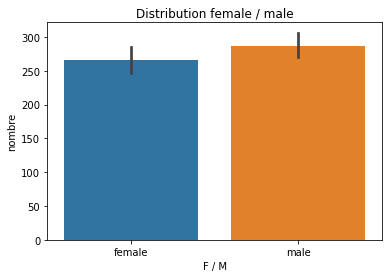

In [14]:
# distributions

print(f"Nombre de participant : {len(data.iid.unique())}")
print('')
print(f"Nombre de femme : {len(data[data.gender == 'female'].iid.unique())}")
print('')
print(f"Nombre d'homme : {len(data[data.gender == 'male'].iid.unique())}")
print('')

ax = sns.barplot(x = 'gender', y = 'iid', data = analysis_stat).set_title('Distribution female / male')
plt.xlabel("F / M")
plt.ylabel("nombre")

plt.show()

In [15]:
age_participants = data[['iid','gender','age']].drop_duplicates(subset=['iid','gender','age'], 
                                                            keep='first')

<AxesSubplot:xlabel='age', ylabel='Count'>

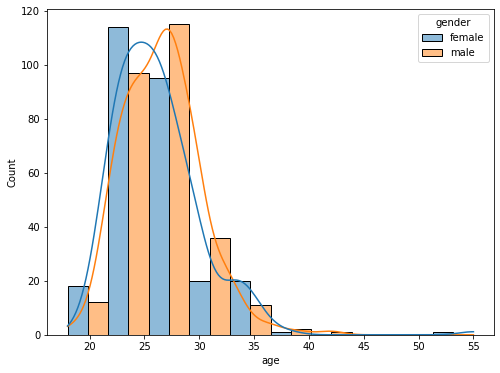

In [16]:
plt.figure(figsize=(8,6))

sns.histplot(age_participants, x='age', hue='gender',kde=True, multiple="dodge", bins=10)

distrtibution par origine:


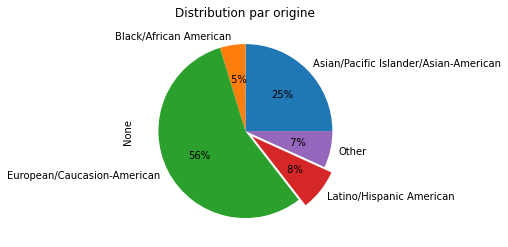

In [17]:
print("distrtibution par origine:")
explode=(0,0,0,0.1,0)

ax = analysis_stat.groupby(['race']).size().plot.pie(y="iid",autopct='%2.0f%%', explode=explode, title="Distribution par origine")

plt.show()

In [18]:
# revenu en int

analysis_stat['income'].replace(regex=['.00'], value ="", inplace=True)
analysis_stat['income'].replace(regex=[','], value ="", inplace=True)
analysis_stat['income'] = pd.to_numeric(analysis_stat['income'])

In [19]:
# remplacer Nan
analysis_stat['income'].fillna((analysis_stat['income'].mean()), inplace=True)
analysis_stat.fillna(analysis_stat.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [20]:
# revenu moyen des F et H

print(f"revenu moyen annuelle des femmes : {round(analysis_stat[analysis_stat.gender == 'female'].income.mean(),2)} euros")

print(f"revenu moyen annuelle des hommes : {round(analysis_stat[analysis_stat.gender == 'male'].income.mean(),2)} euros")


revenu moyen annuelle des femmes : 43774.55 euros
revenu moyen annuelle des hommes : 44117.71 euros


Goal speed dating :


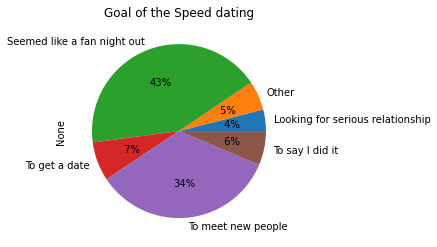

In [21]:

print("Goal speed dating :")
ax = analysis_stat.groupby(['goal']).size().plot.pie(y="iid",autopct='%2.0f%%', title="Goal of the Speed dating")


Fréquences des sorties


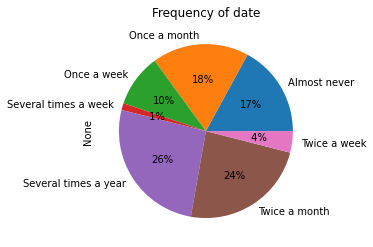

In [22]:
print("Fréquences des sorties")
ax = analysis_stat.groupby(['frequency_of_date']).size().plot.pie(y="iid",autopct='%2.0f%%', title="Frequency of date")


In [23]:
print('Carrière envisagée')
data_career = data[['iid','career_c']].drop_duplicates(subset=['iid','career_c'], 
                                                            keep='first')
data_career.career_c.value_counts()


Carrière envisagée


Academic/Research                                                       152
Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin    144
Lawyer                                                                   47
Creative Arts/Entertainment                                              46
International/Humanitarian Affairs                                       35
Doctor/Medicine                                                          26
Undecided                                                                25
Psychologist                                                             17
Social Work                                                              14
Engineer                                                                 14
Politics                                                                  5
Other                                                                     5
Real Estate                                                               3
Speech Patho

In [24]:
# même origine
data.samerace.value_counts()

0    5062
1    3316
Name: samerace, dtype: int64

In [25]:
#analysis_stat=analysis_stat.drop_duplicates(subset=['iid','gender','race','originally_from','income','goal','frequency_of_date'], keep='first')
#analysis_stat.shape

In [26]:
cols = ['wave','iid']
wave = data[cols]

wave = wave.drop_duplicates(subset=['wave','iid'], keep='first')

print(f"Nombre total de participant : {wave.shape[0]}")
print("---")
print("Nombre de participant par date de speed dating :")

wave.groupby(['wave']).agg({'iid': 'count'})


Nombre total de participant : 551
---
Nombre de participant par date de speed dating :


,iid
wave,
1,20
2,35
3,20
4,36
5,19
6,10
7,32
8,20
9,40


In [27]:
print("Le nombre de rencontre par iid :")

data.groupby('iid')['iid'].count().sort_values(ascending=True)

Le nombre de rencontre par iid :


iid
141     5
140     5
139     5
138     5
137     5
       ..
525    22
526    22
527    22
529    22
552    22
Name: iid, Length: 551, dtype: int64

In [28]:
# iid de ceux qui ont matcher

participants = data[['iid','wave']].drop_duplicates(subset=['iid','wave'], keep='first')
print(f"Nombre total de participant : {len(participants)}")

match = data[data['match'] == 1]
match = match[['iid','wave']].drop_duplicates(subset=['iid','wave'], keep='first')

print(f"Nombre de participant ayant au moins 1 match : {len(match)}")

print ('-----')

# sans_match 
no_match = pd.merge(participants,match, on='iid', how='left')

print(f"Nombre total de participant sans aucun match : {no_match.wave_y.isnull().sum()}")

print(f"soit : {round(((no_match.wave_y.isnull().sum())/(len(match)))*100)}%")

Nombre total de participant : 551
Nombre de participant ayant au moins 1 match : 452
-----
Nombre total de participant sans aucun match : 99
soit : 22%


In [29]:
no_match = no_match[no_match.wave_y.isnull()]

In [30]:
no_match_participant = pd.merge(data,no_match, on='iid', how='inner')

In [31]:
no_match_participant = no_match_participant[['iid','gender','match','goal','go_out']]

In [32]:
no_match_participant = no_match_participant.drop_duplicates(subset=['iid','gender','match','goal','go_out'],
                                                            keep='first')

In [33]:
# Statistiques de ceux qui n'ont matché avec personne

print("PROFIL DES PARTICIPANTS N'AYANT PAS MATCHÉ")
print("")
print("Répartition : Autant d'homme que de femme :")
print('')
print(no_match_participant.gender.value_counts())
print('----')

print("Veulent sortir et rencontrer des gens :")
print('')
print(no_match_participant.goal.value_counts())
print('----')

print('Sortent souvent 1 à 3 fois par semaine :')
print('')
print(no_match_participant.go_out.value_counts())
print('----')


PROFIL DES PARTICIPANTS N'AYANT PAS MATCHÉ

Répartition : Autant d'homme que de femme :

female    53
male      46
Name: gender, dtype: int64
----
Veulent sortir et rencontrer des gens :

Seemed like a fan night out         36
To meet new people                  35
Other                               12
To say I did it                      8
To get a date                        4
Looking for serious relationship     3
Name: goal, dtype: int64
----
Sortent souvent 1 à 3 fois par semaine :

3.0    30
1.0    29
2.0    25
4.0     8
5.0     5
7.0     1
Name: go_out, dtype: int64
----


In [34]:
# nombre de personne qui ont matché plusieurs fois

data_match = data[data.match == 1]
data_match = data_match[['wave','iid','gender','match','goal','frequency_of_date','go_out']]


In [35]:
print(f"Nombre de participant ayant matché au moins 1 fois : {len(data_match.iid.value_counts())}")


Nombre de participant ayant matché au moins 1 fois : 452


In [36]:
data_match.drop('match', axis=1, inplace=True)
data_match = data_match.drop_duplicates(subset=['wave','iid','gender','goal','frequency_of_date','go_out'],
                                        keep='first')

In [37]:
# Statistiques de ceux qui ont matché avec personne

print("PROFIL DES PARTICIPANTS AYANT MATCHÉ")
print("")
print("Répartition : Autant d'homme que de femme :")
print('')
print(data_match.gender.value_counts())
print('----')

print("Veulent sortir et rencontrer des gens :")
print('')
print(data_match.goal.value_counts())
print('----')

print('Sortent souvent 1 à 3 fois par semaine :')
print('')
print(data_match.go_out.value_counts())
print('----')

PROFIL DES PARTICIPANTS AYANT MATCHÉ

Répartition : Autant d'homme que de femme :

male      231
female    221
Name: gender, dtype: int64
----
Veulent sortir et rencontrer des gens :

Seemed like a fan night out         192
To meet new people                  154
To get a date                        36
To say I did it                      27
Looking for serious relationship     19
Other                                18
Name: goal, dtype: int64
----
Sortent souvent 1 à 3 fois par semaine :

2.0    166
1.0    148
3.0     97
4.0     21
5.0      7
6.0      6
7.0      1
Name: go_out, dtype: int64
----


In [38]:
print("what you look for in the opposite sex :")
# (1=not at all important, 10=extremely important).

look_for = data[data.match==1]
cols_1s = ['iid','gender','attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s']
look_for = look_for[cols_1s]
look_for = look_for.drop_duplicates(subset=['iid','gender','attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s'],
                                        keep='first')


what you look for in the opposite sex :


In [39]:
print("what you look for in the opposite sex :")
print("")
print("50 % des participants ayant matché n'ont pas indiqué ce qu'ils recherchent chez l'autre")
print("")     
print(f"participant ayant matché {look_for.shape[0]}")
print("")
print(look_for.isnull().sum())

what you look for in the opposite sex :

50 % des participants ayant matché n'ont pas indiqué ce qu'ils recherchent chez l'autre

participant ayant matché 452

iid           0
gender        0
attr1_s     224
sinc1_s     224
intel1_s    224
fun1_s      224
amb1_s      224
shar1_s     224
dtype: int64


 Quels sont les attibuts recherchés 

attr1_s     20.942368
intel1_s    17.196360
fun1_s      15.132237
sinc1_s     15.090789
shar1_s     12.063070
amb1_s      10.931096
dtype: float64


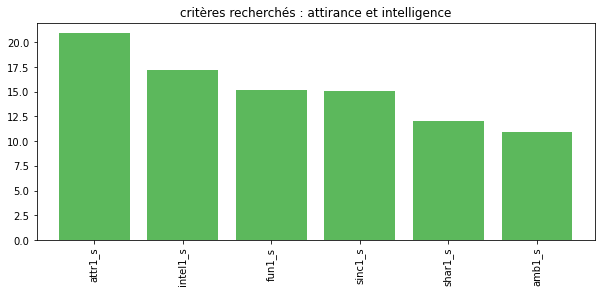

In [40]:
print(" Quels sont les attibuts recherchés ")
print("")
look_for.iloc[:, 2:8].mean().sort_values(ascending=False)
att = look_for.iloc[:, 2:8].mean().sort_values(ascending=False)
print(att)

ax = att.plot(kind='bar', figsize=(10,4),title='critères recherchés : attirance et intelligence', width=0.8, color = '#5cb85c',edgecolor=None)


In [41]:
attributs = ['attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s']
look_for_ = look_for.groupby(['gender'], as_index=False)[attributs].mean()

look_for_.melt(id_vars=["gender"], 
    var_name="look_for_", 
    value_name="mean")


,gender,look_for_,mean
0,female,attr1_s,17.122477
1,male,attr1_s,24.441261
2,female,sinc1_s,16.063945
3,male,sinc1_s,14.199412
4,female,intel1_s,17.931743
5,male,intel1_s,16.522773
6,female,fun1_s,15.016789
7,male,fun1_s,15.237983
8,female,amb1_s,12.253394
9,male,amb1_s,9.719916


<AxesSubplot:xlabel='look_for_', ylabel='means'>

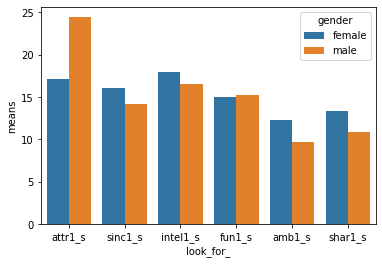

In [42]:
look_for_ = look_for_.melt(id_vars=["gender"], var_name="look_for_", value_name="means")
sns.barplot(data=look_for_, x='look_for_', y='means', hue='gender')


In [43]:
data.them_cal

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
8373    0.0
8374    0.0
8375    0.0
8376    0.0
8377    0.0
Name: them_cal, Length: 8378, dtype: float64

Matrice de corrélation des attributs


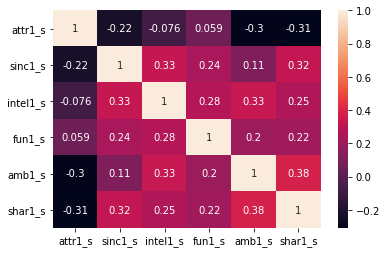

In [44]:
print("Matrice de corrélation des attributs")

del look_for['iid']
corrMatrix = look_for.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [45]:
print(f"Moyenne des attributs des personnes ayant au mois un match : {round(att.mean(),2)}")


Moyenne des attributs des personnes ayant au mois un match : 15.23


In [46]:
# no_match_participant_look_for
no_match_participant_look_for = pd.merge(data,no_match, on='iid', how='inner')

cols_1s = ['iid','gender','attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s']
no_match_participant_look_for = no_match_participant_look_for[cols_1s]
no_match_participant_look_for = no_match_participant_look_for.drop_duplicates(subset=['iid','gender','attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s'],
                                        keep='first')


In [47]:
att_noMatch = no_match_participant_look_for.iloc[:, 2:8].mean().sort_values(ascending=False)
print(f"Moyenne des attributs des personnes n'ayant PAS DE MATCH : {round(att_noMatch.mean(),2)}")

Moyenne des attributs des personnes n'ayant PAS DE MATCH : 13.73


In [48]:
print(f"Centre d'intérêt des parsonnes ayant matché : {activite_match}")

NameError: name 'activite_match' is not defined

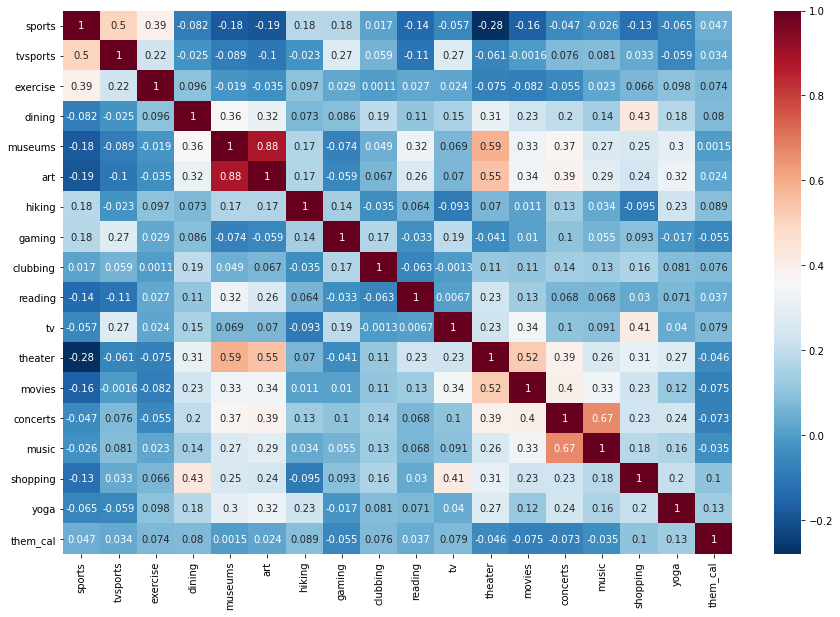

In [50]:
plt.figure(figsize=(15,10))

matrice_hobbies = interests_match.corr()
sns.heatmap(matrice_hobbies, cmap="RdBu_r", annot=True)
plt.show()

In [51]:
match_satistisfait = data[data.match==1]
cols =  ['satis_2',"partner's_decision"]

match_satistisfait = match_satistisfait[cols]
match_satistisfait = match_satistisfait.drop_duplicates(subset=['satis_2',"partner's_decision"],keep='first')
print(f"Satisfaction des participant ayant matché: {match_satistisfait.satis_2.mean()}")

Satisfaction des participant ayant matché: 5.5


In [52]:
no_match_satistisfait = pd.merge(data,no_match, on='iid', how='inner')
cols =  ['satis_2',"partner's_decision"]
no_match_satistisfait = no_match_satistisfait[cols]
no_match_satistisfait = no_match_satistisfait.drop_duplicates(subset=['satis_2',"partner's_decision"],keep='first')

print(f"Satisfaction des participants n'ayant pas matché: {no_match_satistisfait.satis_2.mean()}")

Satisfaction des participants n'ayant pas matché: 4.5


In [53]:
data_call = data[data.match == 1] 
data_call =  data[data.them_cal > 0] 
data_call[['iid','gender','them_cal']]
data_call = data_call[['iid','gender','them_cal']].drop_duplicates(subset=['iid','gender','them_cal'],
                                                                   keep='first')

In [54]:
print(f"Nombre de partitipant ayant été recontacté : {data_call.shape[0]}")

Nombre de partitipant ayant été recontacté : 125
